In [121]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from catppuccin import PALETTE
import numpy as np

In [122]:
theme = PALETTE.latte.colors

plt.rcParams.update({
    "text.usetex": True,
})

# # make font size bigger
plt.rcParams.update({
    "font.size": 20,
    "font.family": "serif",
})

color_robot = theme.green.hex
color_linear = theme.surface2.hex
color_non_linear = theme.maroon.hex

In [123]:
# make the points of an ellipse
def ellipse_points(a, b, angle=0, x0=0, y0=0, n=100):
    t = np.linspace(0, 2*np.pi, n)
    x = a*np.cos(t)
    y = b*np.sin(t)
    x_rot = x*np.cos(angle) - y*np.sin(angle)
    y_rot = x*np.sin(angle) + y*np.cos(angle)
    return x_rot + x0, y_rot + y0

In [124]:
def to_angle(x, a=1):
    return a * (x / np.pi - np.pi / 2)

def from_polar(theta, r=1):
    return r * np.cos(theta), r * np.sin(theta)

# make the circular polar non-linear transform
def circle_transform(points, a=1):
    return list(zip(*[
        from_polar(to_angle(x, a=a), r=y) for x, y in zip(points[0], points[1])
    ]))

def offset_points(points, dx=0, dy=0):
    return list(zip(*[
        (x + dx, y + dy) for x, y in zip(points[0], points[1])
    ]))

In [125]:
# creates `en` ellipses with the same center `x0, y0` and `angle`
# each ellipse is scaled by `scale_factor`
def generate_ellipses(a, b, angle=0, x0=0, y0=0, en=3, n=100, scale_factor=0.1):
    ellipses = [
        ellipse_points(a - a * i * scale_factor, b - b * i * scale_factor, angle, x0, y0, n)
        for i in range(en)
    ]
    return ellipses

/tmp/ipykernel_206163/122020450.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


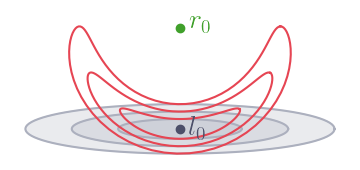

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(4,2))

major = 5
minor = 0.8
radius = 3.25
ellipse = ellipse_points(major, minor)
ellipses = generate_ellipses(major, minor, scale_factor=0.3)

for e in ellipses:
    ax.plot(e[0], e[1], color=color_linear)
    # fill the ellipses
    ax.fill(e[0], e[1], color=color_linear, alpha=0.25)

    transformed = offset_points(circle_transform(offset_points(e, dy=radius)), dy=radius)
    ax.plot(transformed[0], transformed[1], color=color_non_linear, zorder=10)

# point at radius, radius
ax.plot(0, radius, 'o', color=color_robot)
ax.text(0.3, radius, r'$r_0$', color=color_robot, zorder=11)
ax.plot(0, 0, 'o', color=theme.text.hex)
ax.text(0.3, -0.2, r'$l_0$', color=theme.text.hex, zorder=11)
# label the point

# set aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')
# hide axis
ax.axis('off')
# transparent background
fig.patch.set_alpha(0)

fig.tight_layout()
# save as svg
fig.savefig('figures/plots/ellipses-wide.svg')
fig.show()

/tmp/ipykernel_206163/2147085.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


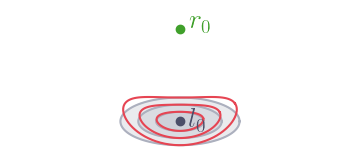

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(4,2))

major = 2
minor = 0.8
radius = 3.1
ellipse = ellipse_points(major, minor)
ellipses = generate_ellipses(major, minor, scale_factor=0.3)

for e in ellipses:
    ax.plot(e[0], e[1], color=color_linear)
    # fill the ellipses
    ax.fill(e[0], e[1], color=color_linear, alpha=0.25)

    transformed = offset_points(circle_transform(offset_points(e, dy=radius)), dy=radius)
    ax.plot(transformed[0], transformed[1], color=color_non_linear, zorder=10)

# point at radius, radius
ax.plot(0, radius, 'o', color=color_robot)
ax.text(0.3, radius, r'$r_0$', color=color_robot, zorder=11)
ax.plot(0, 0, 'o', color=theme.text.hex)
ax.text(0.3, -0.2, r'$l_0$', color=theme.text.hex, zorder=11)
# label the point

# set aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')
# hide axis
ax.axis('off')
# transparent background
fig.patch.set_alpha(0)

fig.tight_layout()
# save as svg
fig.savefig('figures/plots/ellipses-narrow.svg')
fig.show()